### функции по анализу частотности слов и частей речи в корпусе

52
Самое длинное предложение #  37  из  209  слов
Текст самого длинного предложения: 
 "доля доход от реализация экземпляр разработать организация программа для эвм, база данных, передача исключительный право на разработать она программа для эвм, база данных, предоставление право использование указанный программа для эвм, база дать по лицензионный договорам, в тот число путём предоставление удалённый доступ к программа для эвм и база данных, указанный в настоящий абзаце, включая обновление к он и дополнительный функциональный возможности, через информационно-телекоммуникационный сеть "интернет", от оказание услуга (выполнение работ) по разработке, адаптация и модификация программа для эвм, база дать (программный средство и информационный продукт вычислительный техники), а также услуга (работ) по установке, тестирование и сопровождение указанный программа для эвм, база дать (за исключение доход от предоставление право использование программа для эвм, база дать (в тот число путём предост

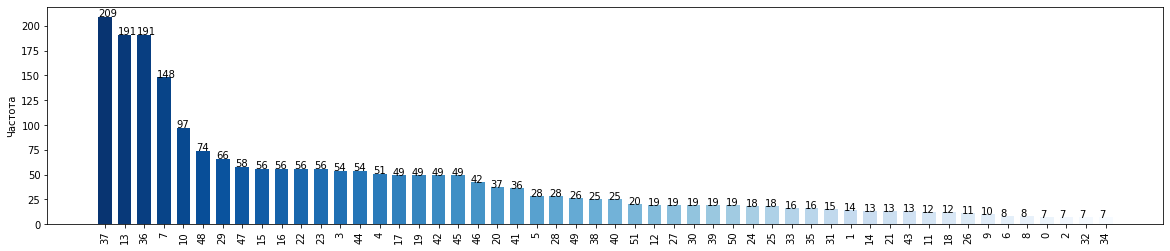

{37: 209, 13: 191, 36: 191, 7: 148, 10: 97, 48: 74, 29: 66, 47: 58, 15: 56, 16: 56, 22: 56, 23: 56, 3: 54, 44: 54, 4: 51, 17: 49, 19: 49, 42: 49, 45: 49, 46: 42, 20: 37, 41: 36, 5: 28, 28: 28, 49: 26, 38: 25, 40: 25, 51: 20, 12: 19, 27: 19, 30: 19, 39: 19, 50: 19, 24: 18, 25: 18, 33: 16, 35: 16, 31: 15, 1: 14, 14: 13, 21: 13, 43: 13, 11: 12, 18: 12, 26: 11, 9: 10, 6: 8, 8: 8, 0: 7, 2: 7, 32: 7, 34: 7}
В корпусе  380  слов


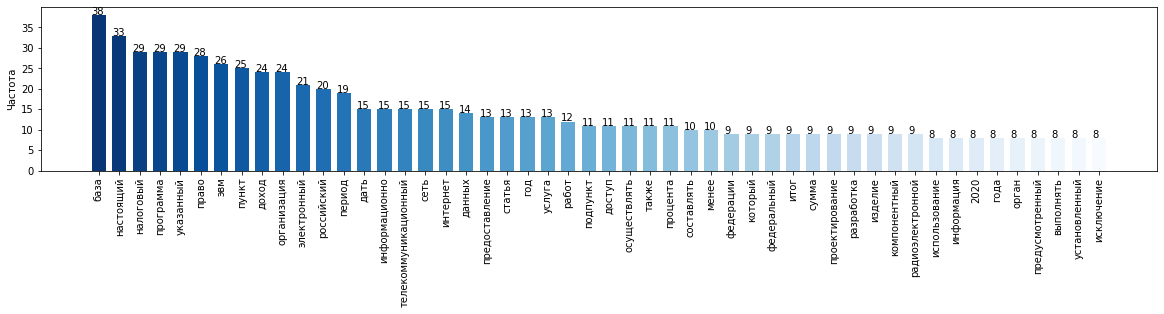

Анализ глаголов
В корпусе  53  слов
50


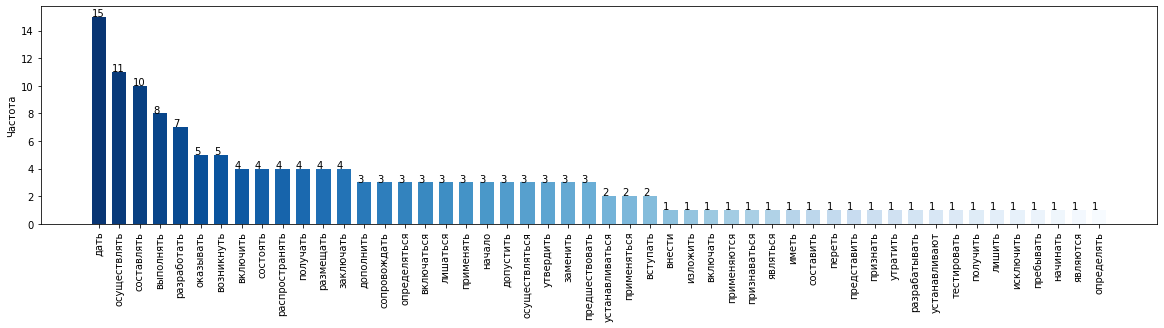

Анализ существительных
В корпусе  120  слов
50


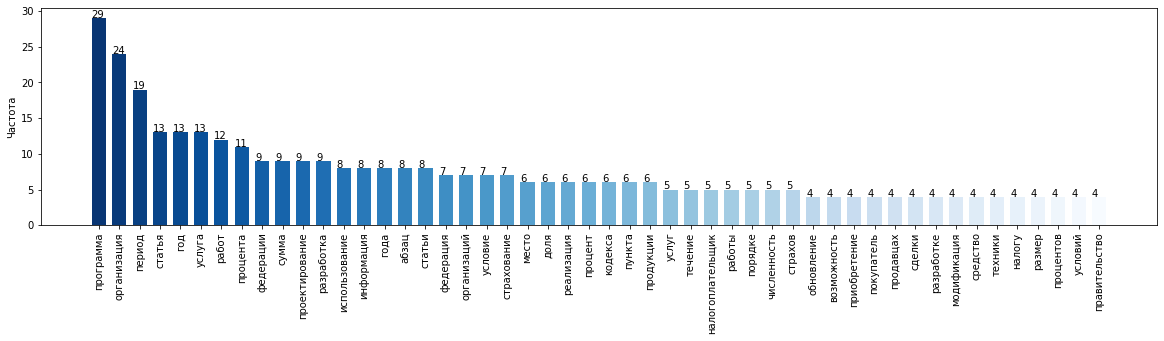

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import numpy as np

def get_corpus_from_file (file):
    with open(file, encoding='UTF-8') as f:
        read_data = f.readlines()
        
    corpus=[]
    for line in read_data:
        if len(line.split())>6: # регулируем показатель, чтобы откинуть "шум", типа "в пункте 2 изменить"
            corpus.append(line)
    return corpus

def get_top_n_words(corpus, stop_words='russian',n=None):
    """
    создает словарь с топ-n словами и выводит график частотности слов
    использует словарь стоп-слов
    """
    from nltk.corpus import stopwords
    stop_words=stopwords.words(stop_words)
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    print ('В корпусе ',len (vec.vocabulary_.items()), ' слов')
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    x_pos = np.arange(len(words_freq[:n]))
    new_x = [2*i for i in x_pos]
    plt.figure(figsize=(20, 3))
    top=dict(words_freq[:n])
    my_cmap = plt.cm.get_cmap('Blues')
    colors = my_cmap([x/len(top) for x in x_pos])[::-1]

    plt.bar(new_x, top.values(),color=colors,width=1.4,align='center')
    plt.xticks(new_x, top.keys(),rotation='vertical') 
    plt.ylabel('Частота')
    bars=plt.bar(new_x, top.values(),color=colors,width=1.4,align='center')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .05, yval)
    plt.show()

    
    return words_freq[:n]

def norm_copus(corpus):
    # приводит слова в нормальному форму
    import pymorphy2
    prob_thresh = 0.7
    morph = pymorphy2.MorphAnalyzer()
    normalized_corpus=[]
    for line in corpus:
        norm_words=[]
        for word in line.split():
            norm_words.append(morph.parse(word)[0].normal_form)
        normalized_corpus.append (" ".join(norm_words))
    return normalized_corpus

    
    
def split_by_sentence(corpus):
    #разбиваем абзац на предложения
    import pickle
    from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer, PunktParameters
    
    sentences=[]
    with open('./tokenizer_no_digit.pickle', 'rb') as f: # грузим обученный токенайзер предложений 
        trainer=pickle.load(f)
    tokenizer = PunktSentenceTokenizer(trainer.get_params())
    for line in corpus:
        sentences.append(tokenizer.sentences_from_text(line, realign_boundaries=True))
    print ('В корпусе ', len(sentences) ,' предложений')
        
    return sentences

def get_top_sentences_by_words(sentences):
    d=dict()  # количество слов
    d2=dict() # запятые
    n=0
    for sentence in sentences:
        words=len (sentence.split())
        commas=len (sentence.split(','))        
        d[n]=words
        d2[n]=commas
        n+=1
    top_sent=list(sorted(d.items(), key=lambda x: x[1],reverse=True))
    top_commas=list(sorted(d2.items(), key=lambda x: x[1],reverse=True))

    lenght =[]

    for top in top_sent:
        lenght.append(top[1])
        
    print ('Самое длинное предложение # ', top_sent[0][0], ' из ',top_sent[0][1], ' слов')
    print ('Текст самого длинного предложения:','\n',sentences[top_sent[0][0]],'\n')
    print ('Среднее количество слов в предложении: ',np.mean (lenght))
    print ('Медиана слов в предложениии: ',np.median (lenght))
    #print (sorted(d.items(), key=lambda x: x[1],reverse=True))
    
    lenght_commas=[]
    for comma in top_commas:
        lenght_commas.append(comma[1])
    
    print ('Max-запятых в предложении # ', top_commas[0][0], ' - ',top_commas[0][1], ' штук')
    print ('Среднее количество запятых в предложении: ',np.mean (lenght_commas))
    print ('Медиана запятых в предложениии: ',np.median (lenght_commas))

    x_pos = np.arange(len(top_sent))
    new_x = [2*i for i in x_pos]
    plt.figure(figsize=(20, 4))

    my_cmap = plt.cm.get_cmap('Blues')
    colors = my_cmap([x/len(top_sent) for x in x_pos])[::-1]
    top=dict(top_sent)
    bars=plt.bar(new_x, top.values(),color=colors,width=1.4,align='center')
    plt.xticks(new_x, top.keys(),rotation='vertical') 
    plt.ylabel('Частота')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .15, yval)
    plt.show ()

    
    return dict(sorted(d.items(), key=lambda x: x[1],reverse=True))
        

def get_top_n_words_by_verbs (corpus, stop_words='russian',n=None):
    """
    создает словарь с топ-n словами, частями речи и выводит график частотности слов
    использует словарь стоп-слов
    """
    import pymorphy2
    from nltk.corpus import stopwords
    stop_words=stopwords.words(stop_words)
    print ('Анализ глаголов')
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    words=dict(words_freq)
    #TOS_dict={}
    TOS_freq=[]
    prob_thresh = 0.7
    morph = pymorphy2.MorphAnalyzer()
    for i in range (len(words_freq)):
        for p in morph.parse(words_freq[i][0]):
            if ('INFN' in p.tag or 'VERB' in p.tag ) and p.score >= prob_thresh:
                TOS_freq.append((words_freq[i][0],words_freq[i][1]))
                
    #print (TOS_freq)
    print ('В корпусе ',len (TOS_freq), ' слов')
    top=dict(TOS_freq[:n])
    print (len(top))
    x_pos = np.arange(len(TOS_freq[:n]))
    new_x = [2*i for i in x_pos]
    plt.figure(figsize=(20, 4))

    my_cmap = plt.cm.get_cmap('Blues')
    colors = my_cmap([x/len(top) for x in x_pos])[::-1]

    bars=plt.bar(new_x, top.values(),color=colors,width=1.4,align='center')
    plt.xticks(new_x, top.keys(),rotation='vertical') 
    plt.ylabel('Частота')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .05, yval)
    plt.show()
                
    return 

def get_top_n_words_by_nouns (corpus, stop_words='russian',n=None):
    """
    создает словарь с топ-n словами, частями речи и выводит график частотности слов
    использует словарь стоп-слов
    """
    import pymorphy2
    from nltk.corpus import stopwords
    stop_words=stopwords.words(stop_words)
    print ('Анализ существительных')
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    words=dict(words_freq)
    #TOS_dict={}
    TOS_freq=[]
    prob_thresh = 0.7
    morph = pymorphy2.MorphAnalyzer()
    for i in range (len(words_freq)):
        for p in morph.parse(words_freq[i][0]):
            if ('NOUN' in p.tag or 'Abbr' in p.tag) and p.score >= prob_thresh:# проверяем еще на аббревиатуры
                TOS_freq.append((words_freq[i][0],words_freq[i][1]))
                
    #print (TOS_freq)
    print ('В корпусе ',len (TOS_freq), ' слов')
    top=dict(TOS_freq[:n])
    print (len(top))
    x_pos = np.arange(len(TOS_freq[:n]))
    new_x = [2*i for i in x_pos]
    plt.figure(figsize=(20, 4))

    my_cmap = plt.cm.get_cmap('Blues')
    colors = my_cmap([x/len(top) for x in x_pos])[::-1]

    bars=plt.bar(new_x, top.values(),color=colors,width=1.4,align='center')
    plt.xticks(new_x, top.keys(),rotation='vertical') 
    plt.ylabel('Частота')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .05, yval)
    plt.show()
                
    return 
    


file='./it move clean.txt' # файл с текстом в формате UTF-8

corpus= norm_copus(get_corpus_from_file (file))
print (len(corpus))

words=get_top_sentences_by_words(corpus)

print (words)


top=get_top_n_words(corpus,n=50)


get_top_n_words_by_verbs (corpus, stop_words='russian',n=50)

get_top_n_words_by_nouns (corpus, stop_words='russian',n=50)


